In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use("ggplot")

In [2]:
DATASET = r"C:\Users\91930\Documents\GITHUB\ArtOfAI\dataset\quikr_car.csv"

In [13]:
car = pd.read_csv(DATASET)

In [14]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [15]:
car.shape

(892, 6)

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Creating backup copy

In [17]:
backup = car.copy()

#### Cleaning Data

year has many non-year values

In [18]:
car = car[car['year'].str.isnumeric()]
# car

year is in object. Change to integer

In [19]:
car['year'] = car['year'].astype(int)
# car

Price has Ask for Price

In [23]:

car = car[car['Price'] != 'Ask For Price']
# car

Price has commas in its prices and is in object

In [25]:
car['Price'] = car['Price'].str.replace(",", "").astype(int)

kms_driven has object values with kms at last

In [26]:
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(",", "")

It has nan values and two rwos have 'Petrol' in them

In [27]:
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

fuel_type has nan values


In [34]:
# 
car = car[~car['fuel_type'].isna()]

In [35]:
car.shape

(816, 6)

#### Name and company had spammed data...but with the previous cleaning, those rows got removed

Company does not need any cleaning. Changing car names. Keeping only the first three words.

In [36]:
car['name'] = car['name'].str.split().str.slice(start=0, stop=3).str.join(" ")

In [37]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


Reseting the index of the final cleaned data

In [38]:
car = car.reset_index(drop=True)
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


#### Cleaned Data

In [39]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [41]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [43]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [44]:
car = car[car['Price'] < 600000]

#### Checking relationship of Company with Price

In [45]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi',
       'Renault', 'Honda', 'Datsun', 'Tata', 'Volkswagen', 'Chevrolet',
       'Toyota', 'Nissan', 'Hindustan', 'Fiat', 'Force', 'Mercedes',
       'Mitsubishi'], dtype=object)

In [46]:
import seaborn as sns

C:\Users\91930\AppData\Local\Temp\ipykernel_19012\1140310062.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


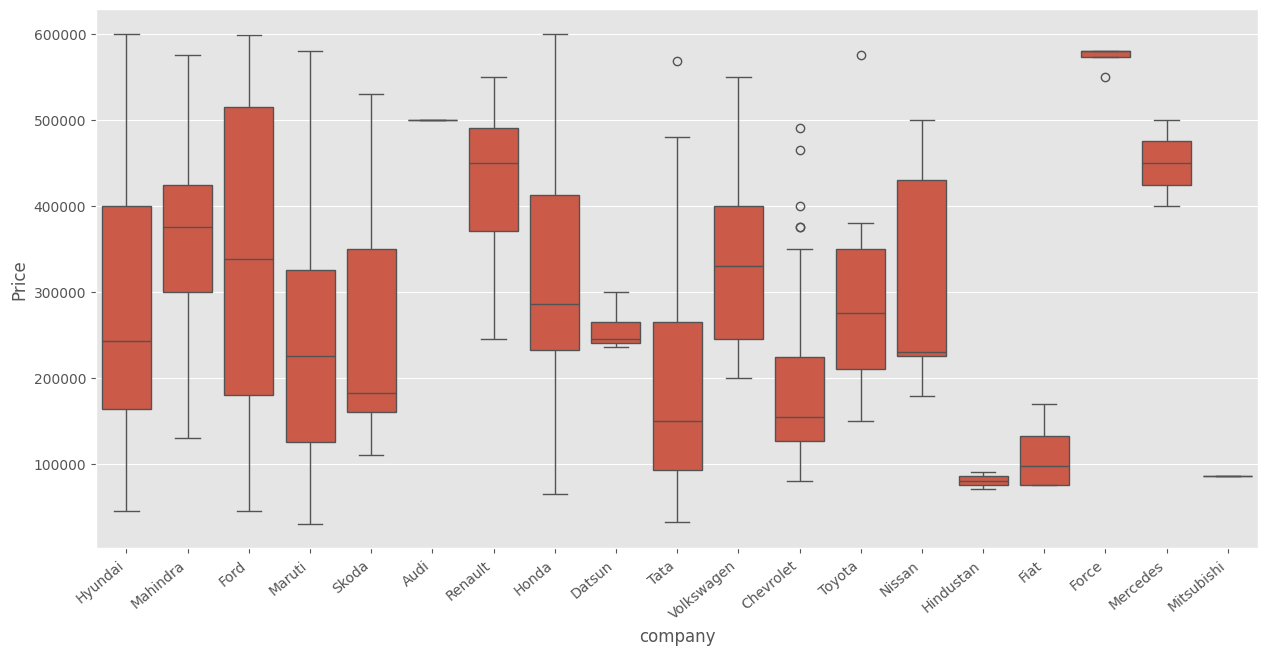

In [49]:
plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

#### Checking relationship of Year with Price

C:\Users\91930\AppData\Local\Temp\ipykernel_19012\1045040806.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


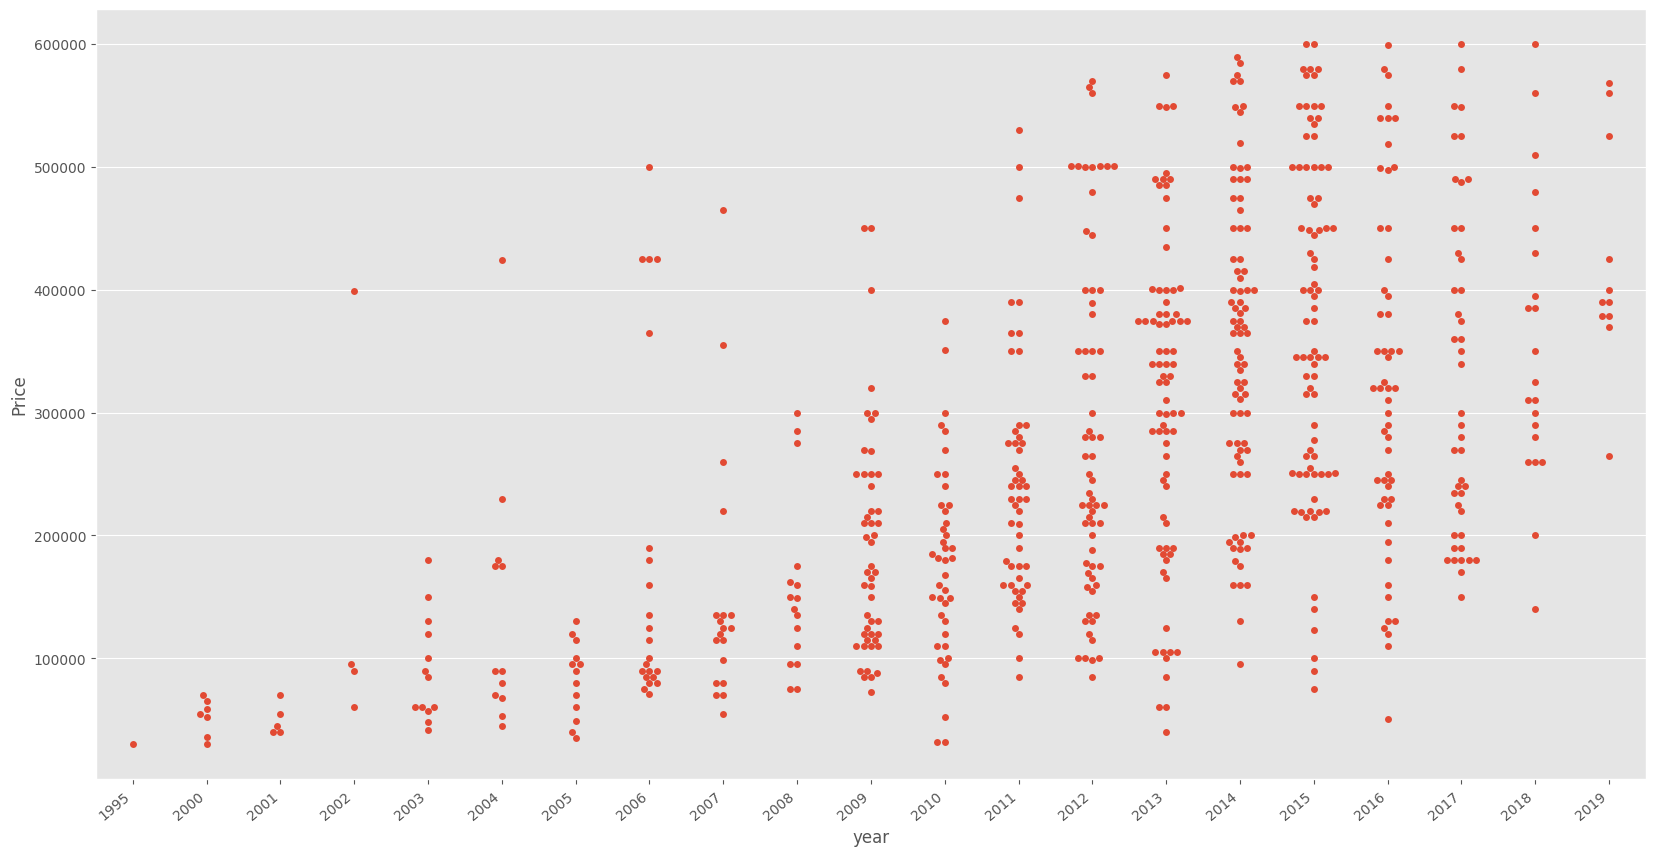

In [51]:
plt.subplots(figsize=(20, 10))
ax = sns.swarmplot(x='year', y='Price', data=car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

#### Checking relationship of kms_driven with Price

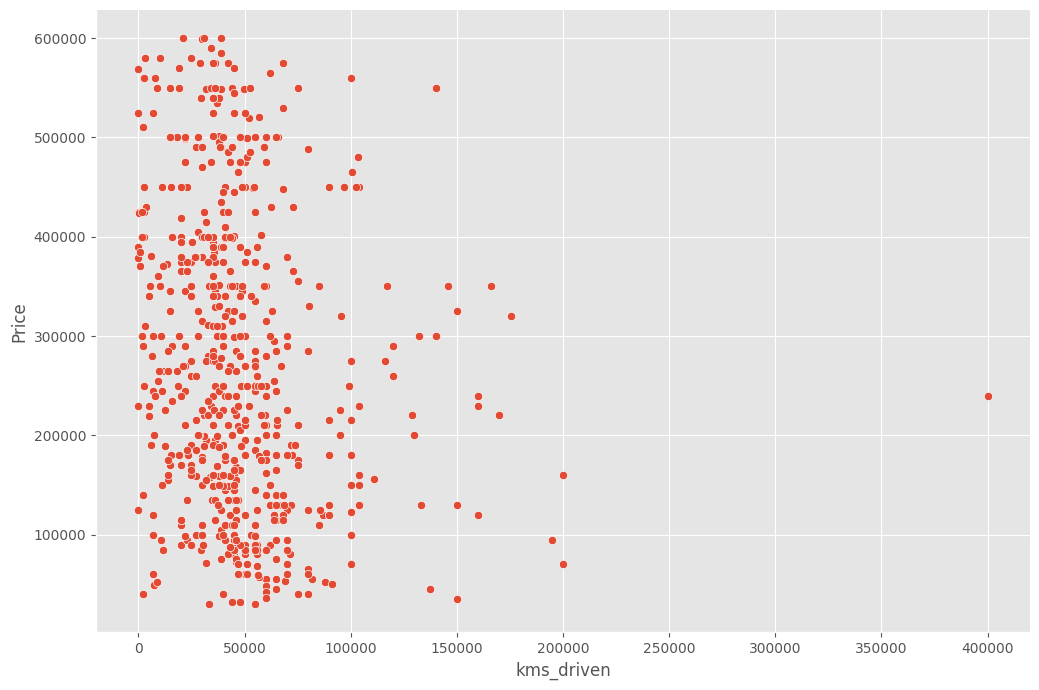

In [52]:
sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5)

#### Checking relationship between Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

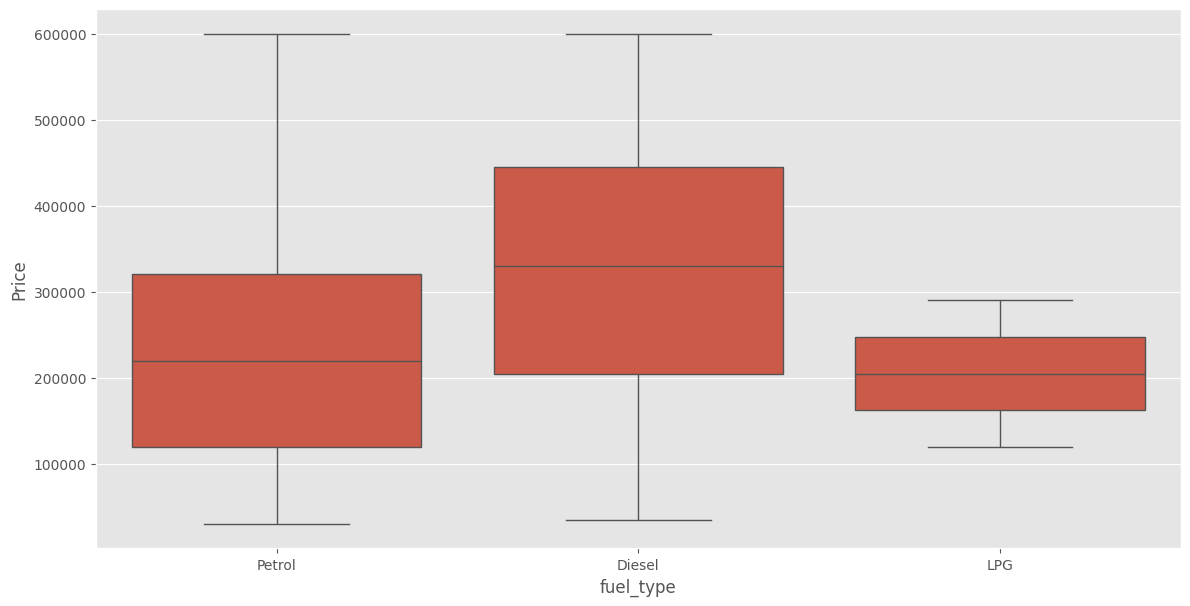

In [53]:
plt.subplots(figsize=(14, 7))
sns.boxplot(x="fuel_type", y="Price", data=car)